# Question 06

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")

import warnings
warnings.simplefilter("ignore")

crs = ccrs.PlateCarree()

In [2]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

SST of Figures 3a and 3e are 1000 km offshore

light grey = envelope of maximum and minimum values during 2002 - 2013

dark grey = envelope of +- SD around the mean during 2002 - 2013

black, blue, red, and green lines indicate the mean during 2002–2013 and the values during 2014, 2015, and 2016, respectively


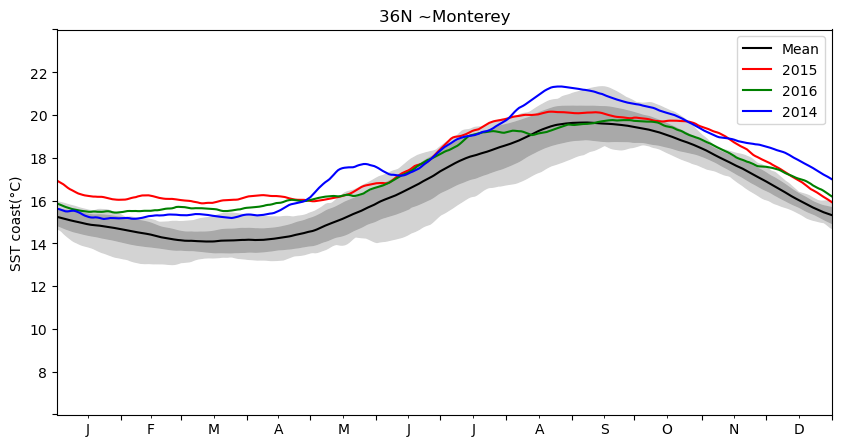

In [3]:
# Locating Monterey, CA and converting from kelvin to celcius during 2002 to 2013.
# 1000km offshore, 1 degree of longitude is 111km so roughly 9 more degrees from -122 -> -131 longitude
monterey = ds.analysed_sst.sel(lat = 36, lon = -131, method = 'nearest') - 273.15
monterey = monterey.rolling(time= 30, center = True).mean()

# cleaning year 2002 - 2013
mon_min = monterey.sel(time = slice('2002', '2013')).groupby('time.dayofyear').min()
mon_max = monterey.sel(time = slice('2002', '2013')).groupby('time.dayofyear').max()
mon_mean = monterey.sel(time = slice('2002', '2013')).groupby('time.dayofyear').mean()
mon_std = monterey.sel(time = slice('2002', '2013')).groupby('time.dayofyear').std()
pos_std = mon_mean + mon_std
neg_std = mon_mean - mon_std

# plot year 2002 - 2013
fig, ax = plt.subplots(figsize = (10, 5))
ax.fill_between(mon_mean.dayofyear.values, mon_min, mon_max, color = 'lightgray')
ax.fill_between(mon_mean.dayofyear.values, neg_std, pos_std, color =  'darkgray')
ax.plot(mon_mean.dayofyear.values, mon_mean, 'k', label = 'Mean');

# plot year 2014, 2015, 2016
years = [2015, 2016, 2014]
color = ['r', 'g', 'b']

for i in range(len(years)):
    rgb_year = monterey.sel(time = str(years[i])).groupby('time.dayofyear').mean()
    ax.plot(rgb_year.dayofyear.values, rgb_year.values, color = color[i], label = str(years[i]))

# set axis
months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
month_range = [31, 59, 90, 120, 151, 181, 212, 243, 272, 304, 334, 365]
plt.xlim(1, 365)
ax.set_xticks(month_range)
ax.set_xticklabels(months)
ax.set_xticklabels('')
ax.set_xticks([15.5, 45, 74.5, 105, 135.5, 166, 196.5, 227.5, 258, 287.5, 319, 349.5], minor = True)
ax.set_xticklabels(months, minor = True)
plt.ylim(6, 24)
ax.set_yticklabels(['', '8', '10', '12', '14', '16', '18', '20', '22', ''])
plt.ylabel('SST coast(°C)')
plt.title('36N ~Monterey')
ax.legend();
plt.savefig('outputs/Question06.png')